## Data Wrangling

***

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### No ML Analyses

Total Profit:  206.53275000000664
Mean Profit:  0.10184060650887902
Winning Trades:  1251
Losing Trades:  777
Win Rate:  0.6168639053254438


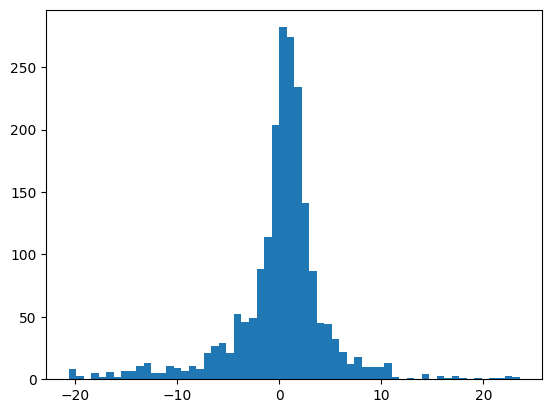

In [6]:
# Get data
conn1 = sqlite3.connect("XGBoost/Test_No_ML/ledger.db")
c1 = conn1.cursor()

# Extract data
c1.execute("""SELECT * FROM tx_ledger WHERE status = 'CLOSED'""")
trade_log = c1.fetchall()
trade_log_df = pd.DataFrame(
    trade_log, columns=["Pair", "Type", "Open Date", "Close Date", "Status", "Units 1", "Units 2", "ETH Vol", "BTC Vol", "Pair 1 Open", "Pair 2 Open", "Pair 1 Close", "Pair 2 Close"]).drop(["Open Date", "Close Date"], axis=1)

# Generate profit information
trade_log_df["Profit"] = np.where(
    trade_log_df["Type"] == "Long", 
    trade_log_df["Units 1"] * trade_log_df["Pair 1 Close"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 Open"] + trade_log_df["Units 2"] * trade_log_df["Pair 2 Close"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 Open"], 
    trade_log_df["Units 1"] * trade_log_df["Pair 1 Open"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 Close"] + trade_log_df["Units 2"] * trade_log_df["Pair 2 Open"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 Close"])
trade_log_df["Profit"].sum()

# Report profit and graph
print("Total Profit: ", trade_log_df["Profit"].sum())
print("Mean Profit: ", trade_log_df["Profit"].mean())
print("Winning Trades: ", len(trade_log_df[trade_log_df["Profit"] > 0]))
print("Losing Trades: ", len(trade_log_df[trade_log_df["Profit"] < 0]))
print("Win Rate: ", len(trade_log_df[trade_log_df["Profit"] > 0]) / (len(trade_log_df[trade_log_df["Profit"] > 0]) + len(trade_log_df[trade_log_df["Profit"] < 0])))

import matplotlib.pyplot as plt
plt.hist(trade_log_df[trade_log_df["Profit"] != 0]["Profit"], bins=60)
plt.show()

### With ML Analyses

Total Profit:  326.6126100000048
Mean Profit:  0.20025297976701703
Winning Trades:  1014
Losing Trades:  617
Win Rate:  0.621704475781729


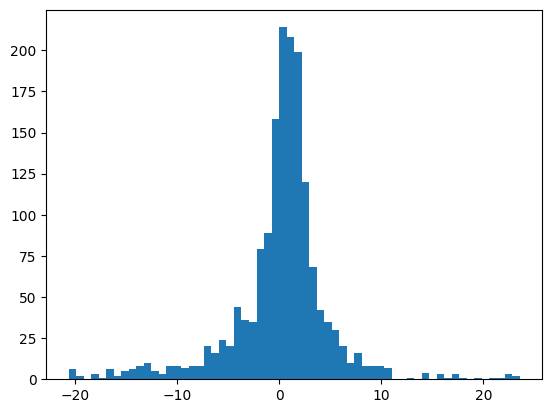

In [5]:
# Get data
conn2 = sqlite3.connect("XGBoost/Test_With_ML/ledger.db")
c2 = conn2.cursor()

# Extract data
c2.execute("""SELECT * FROM tx_ledger WHERE status = 'CLOSED'""")
trade_log = c2.fetchall()
trade_log_df = pd.DataFrame(
    trade_log, columns=["Pair", "Type", "Open Date", "Close Date", "Status", "Units 1", "Units 2", "ETH Vol", "BTC Vol", "Pair 1 Open", "Pair 2 Open", "Pair 1 Close", "Pair 2 Close"]).drop(["Open Date", "Close Date"], axis=1)

# Generate profit information
trade_log_df["Profit"] = np.where(
    trade_log_df["Type"] == "Long", 
    trade_log_df["Units 1"] * trade_log_df["Pair 1 Close"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 Open"] + trade_log_df["Units 2"] * trade_log_df["Pair 2 Close"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 Open"], 
    trade_log_df["Units 1"] * trade_log_df["Pair 1 Open"] - trade_log_df["Units 1"] * trade_log_df["Pair 1 Close"] + trade_log_df["Units 2"] * trade_log_df["Pair 2 Open"] - trade_log_df["Units 2"] * trade_log_df["Pair 2 Close"])
trade_log_df["Profit"].sum()

# Report profit and graph
print("Total Profit: ", trade_log_df["Profit"].sum())
print("Mean Profit: ", trade_log_df["Profit"].mean())
print("Winning Trades: ", len(trade_log_df[trade_log_df["Profit"] > 0]))
print("Losing Trades: ", len(trade_log_df[trade_log_df["Profit"] < 0]))
print("Win Rate: ", len(trade_log_df[trade_log_df["Profit"] > 0]) / (len(trade_log_df[trade_log_df["Profit"] > 0]) + len(trade_log_df[trade_log_df["Profit"] < 0])))


import matplotlib.pyplot as plt
plt.hist(trade_log_df[trade_log_df["Profit"] != 0]["Profit"], bins=60)
plt.show()